# 인공지능과 가위바위보 하기

#### Mnist dataset을 이용하여 인공지능과 가위바위보를 해보자!


##### 목차  

- mnist 데이터셋으로 연습해보기
- 가위바위보 분류기 만들어보기

In [240]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동진행. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


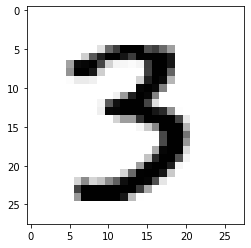

10001 번째 이미지의 숫자는 바로  3 입니다.


In [241]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [90]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [91]:
# 손글씨 픽셀 값
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

# MNIST 데이터의 각 픽셀의 값
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


<br>  
<br>  

---


## Sequential Model 사용하기  

<br>  
<br>  
텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용해보자

In [92]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [93]:
model.summary() # 후에 코드를 수정할 예정이니 모델 확인 일단 해보기

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

<br>  
<br>  

## 딥러닝 네트워크 학습시키기

In [94]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [95]:
# 학습하기! 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1823 - accuracy: 0.9451
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0620 - accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0465 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0356 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0289 - accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0233 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0130 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 31s 17m

**인식 정확도가 0.9413에서 0.9957까지 높게 올라간다. 9 epoch정도부터는 인식률의 상승이 미미하다. <br>  
학습할 때마다 인식 정확도는 변동되긴 한다만 10 epoch정도 학습을 시키면 충분할 것 같다.**<br>  
<br>  
<br>  
## 잘 만들어졌는지 확인하기
<br>  
<br>  

In [96]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0331 - accuracy: 0.9902
test_loss: 0.033076439052820206
test_accuracy: 0.9901999831199646


In [97]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [6.9954681e-11 2.1200814e-08 4.0463006e-09 3.0258346e-07 3.2342151e-10
 2.5275693e-09 4.9589173e-16 9.9999940e-01 1.4924055e-09 2.6605895e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


_*이 벡터는 model이 추론한 결과가 각각 0, 1, 2, ..., 7, 8, 9일 확률을 의미*_

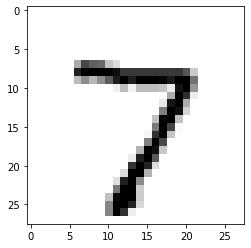

In [98]:
# 숫자 7인지 확인해보기
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [5.81212269e-08 3.74533604e-09 1.45797585e-05 9.58739460e-01
 1.00187371e-12 3.17560589e-10 4.88422192e-10 2.47592213e-09
 4.12458628e-02 5.55786306e-10]
라벨: 8, 예측결과: 3


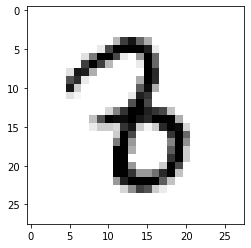

예측확률분포: [2.51125966e-05 1.44691242e-07 2.13702691e-08 2.34207567e-02
 9.57900710e-08 5.73088109e-01 5.18741183e-09 1.11498856e-07
 2.57453579e-03 4.00891215e-01]
라벨: 9, 예측결과: 5


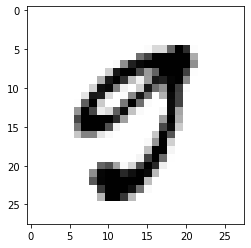

예측확률분포: [6.3183880e-09 1.3104983e-08 3.3131844e-01 4.4254662e-05 1.8313225e-08
 1.1105033e-08 2.3295430e-14 6.6863668e-01 6.7233049e-07 3.2954233e-11]
라벨: 2, 예측결과: 7


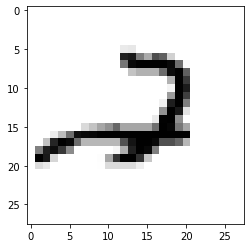

예측확률분포: [2.1065889e-06 1.7913471e-03 2.4876224e-05 1.6373183e-04 3.2648884e-05
 8.9819735e-04 4.9051080e-10 5.3248137e-02 5.3143981e-03 9.3852448e-01]
라벨: 7, 예측결과: 9


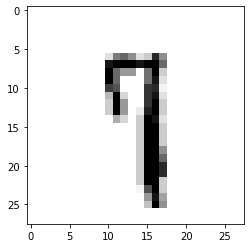

예측확률분포: [9.7514069e-01 9.1810309e-12 5.7956612e-07 2.8147820e-08 6.2569706e-11
 3.9709914e-07 1.8124706e-04 7.7781720e-10 2.4646342e-02 3.0708925e-05]
라벨: 8, 예측결과: 0


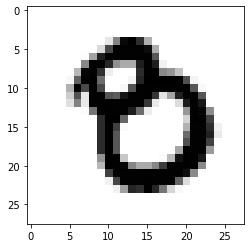

In [99]:
# 실제 라벨의 값과 추론해낸 숫자 값이 다른 경우
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

**사람이 봐도 혼란스럽다...**

### 더 좋은 네트워크를 만들어 볼 순 없나?


<br>  
<br>

---  
<br>  

In [100]:

# params = [[32, 64, 64 ,10], [32, 32, 64 ,10]]

# for pram in params
#     n_channel_1 = pram[0]
# for문 돌려서 편하게 할 걸,,,,하는 생각,,,,,

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

---
---
**---**

---
---

# 가위바위보 분류기 만들기


In [246]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [247]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [248]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

521  images to be resized.
521  images resized.
가위 이미지 resize 완료!


In [249]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

408  images to be resized.
408  images resized.
바위 이미지 resize 완료!


In [250]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

506  images to be resized.
506  images resized.
보 이미지 resize 완료!


In [251]:
import numpy as np

def load_data(img_path, number_of_data=1435):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1435 입니다.
x_train shape: (1435, 28, 28, 3)
y_train shape: (1435,)


라벨:  0


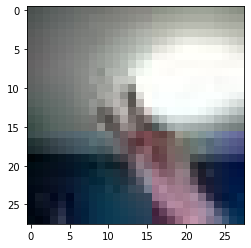

In [252]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [253]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model 만들기
# Hint! model의 입력/출력부에 특히 유의
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_39 (Dense)             (None, 32)              

In [254]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2) 

Epoch 1/20
36/36 [==============================] - 2s 50ms/step - loss: 9.0156 - accuracy: 0.5009 - val_loss: 9.4247 - val_accuracy: 0.0244
Epoch 2/20
36/36 [==============================] - 1s 40ms/step - loss: 0.6898 - accuracy: 0.7814 - val_loss: 0.3759 - val_accuracy: 0.8955
Epoch 3/20
36/36 [==============================] - 1s 38ms/step - loss: 0.2841 - accuracy: 0.8920 - val_loss: 1.1261 - val_accuracy: 0.6760
Epoch 4/20
36/36 [==============================] - 1s 39ms/step - loss: 0.2339 - accuracy: 0.9129 - val_loss: 0.2613 - val_accuracy: 0.9129
Epoch 5/20
36/36 [==============================] - 1s 38ms/step - loss: 0.2241 - accuracy: 0.9120 - val_loss: 0.4153 - val_accuracy: 0.8711
Epoch 6/20
36/36 [==============================] - 1s 38ms/step - loss: 0.1424 - accuracy: 0.9451 - val_loss: 0.2795 - val_accuracy: 0.9024
Epoch 7/20
36/36 [==============================] - 1s 38ms/step - loss: 0.1017 - accuracy: 0.9617 - val_loss: 0.3310 - val_accuracy: 0.8920
Epoch 8/20
36

In [255]:
# 테스트용 데이터 가위,바위,보에 대하여 이미지 사이즈 조정하기

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("test용 가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("test용 바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("test용 보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
test용 가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
test용 바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
test용 보 이미지 resize 완료!


In [256]:
def load_data2(img_path_, number_of_data_=300):  
    # 가위, 바위, 보 이미지 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    img_size_ = 28
    color_ = 3
    imgs_ = np.zeros(number_of_data_ * img_size_ * img_size_ * color_, dtype=np.int32).reshape(number_of_data_, img_size_, img_size_, color_)
    labels_ = np.zeros(number_of_data_, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path_+'/scissor/*.jpg'):
        img_ = np.array(Image.open(file), dtype=np.int32)
        imgs_[idx, :, :, :] = img_    # 데이터 영역에 이미지 행렬을 복사
        labels_[idx] = 0   # 가위 : 0
        idx += 1

    for file in glob.iglob(img_path_+'/rock/*.jpg'):
        img_ = np.array(Image.open(file), dtype=np.int32)
        imgs_[idx, :, :, :] = img_    # 데이터 영역에 이미지 행렬을 복사
        labels_[idx] = 1   # 바위 : 1
        idx += 1  
    
    for file in glob.iglob(img_path_+'/paper/*.jpg'):
        img_ = np.array(Image.open(file), dtype=np.int32)
        imgs_[idx, :, :, :] = img_    # 데이터 영역에 이미지 행렬을 복사
        labels_[idx] = 2   # 보 : 2
        idx += 1
        
    print("학습데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs_, labels_

In [257]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data2(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [258]:
# model 추론 결과

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 3.2713 - accuracy: 0.5800
test_loss : 3.2712714672088623
test_accuracy : 0.5799999833106995


---

## 회고
<br>  
<br> 


  ### Keep  

- 이것저것 자료를 찾아보려고 노력하고 혼자 애써본 것. 첫 메인퀘스트부터 지금까지 이어지는 것 같다.
### Problem  

- 막히니까 사고회로가 정지되는 것 또한 익숙해지지 않는다...평균도 낮게 나왔고, 학습시킬 때마다 바뀌는게 여전히 알다가도 모르겠다. 당황하지 말아야하는데 :(
### Try  

- 의연하게 대처하여 시간을 버리는 일이 없도록 더 노력해야겠다. 